In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import seaborn as sns

import random

from elo import *

from sklearn.preprocessing import LabelEncoder
sns.set_style("darkgrid")
sns.set_context("notebook")

#_________________________________________________________


#____________________________________________________________

s = System()

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#SET VARIABLES FROM HERE
# Add players
playercount = 30
#size of item pool
itemcount = 4500
#nr of items each player is given = nr of matches
itemnr = 3000
#scenario -1 = random, 0 = perfect, 1 = range
r = -1

earlystop = False

# Add Classes
s.addClass("a", 1000)

# Data for output
dataRand = []
dataPerf = []
dataRang = []
    
# Add players for each class
for p in range(playercount):
    s.addPlayer(str(p), "a", s.getClass("a").startrating)

# Generate question list (mean, std dev, amount)
itemdist = np.random.normal(1000, 300, itemcount)
for i in range(itemcount):
    s.addItem(str(i), rating=itemdist[i])

# Simulation method (adaptability range (-1 all random, 0 all adaptive))
def simulate(r):  
    # Clear output
    dataRand = []
    dataPerf = []
    dataRang = []
    print("scenario: " + str(r))
    print("playercount: " + str(playercount))
    print("itempool: " + str(itemcount))
    print("#items: " + str(itemnr))
    for p in range(playercount):
        print("Still going! At:", p * 3.333, "%", datetime.datetime.now())
        for i in range(itemnr):
            if r == -1:
                no_adaptivity(p, i)
            elif r == 0:
                perfect_adaptivity(p, i)
                if earlystop:
                    break
            else:
                range_adaptivity(p, i)
                if earlystop:
                    break
    print("Done!", datetime.datetime.now())

def no_adaptivity(p, q):
    item = s.getItem(str(np.random.randint(0, itemcount)))
    player = s.getPlayer(str(p))
    s.game(player.name, item.name)
    dataRand.append([player.name, s.getPlayerRating(str(p)), q])
    #earlystop = False


def perfect_adaptivity(p, q):
    player = s.getPlayer(str(p))
    earlystop = True
    for i in range(itemcount):
        chance = np.round(s.getPlayer(str(p)).compareRating(s.getPlayer(str(p)), s.getItem(str(i))), 1)
        if chance == 0.5:
            itemmatch = s.getItem(str(i))
            s.game(player.name, itemmatch.name)
            dataPerf.append([player.name, s.getPlayerRating(str(p)), q])
            earlystop = False
            break

            
def range_adaptivity(p, q):
    player = s.getPlayer(str(p))
    earlystop = True
    for i in range(itemcount):
        item = s.getItem(str(i))
        chance = np.round(s.getPlayer(str(p)).compareRating(s.getPlayer(str(p)), item), 2)
        if chance > 0.15 and chance < 0.85:
            s.game(player.name, item.name)
            dataRang.append([player.name, s.getPlayerRating(str(p)), q])
            earlystop = False
            break

In [10]:
# Run simulation for all methods, create dataframes and write them to csv

simulate(-1)
dfRand = pd.DataFrame(dataRand, columns = ['Player', 'Elo', '#Questions'])
dfRand.info()
dfRand.to_csv('outrand-5000-6500')

simulate(0)
dfPerf = pd.DataFrame(dataPerf, columns = ['Player', 'Elo', '#Questions'])
dfPerf.to_csv('outperfect30-5000-6500')
#dfPerf.info()

simulate(300) #213 min
dfRang = pd.DataFrame(dataRang, columns = ['Player', 'Elo', '#Questions'])
dfRang.to_csv('outrang-5000-6500')
#dfRang.info()

scenario: -1
playercount: 30
itempool: 4500
#items: 3000
Still going! At: 0.0 % 2021-10-29 00:21:00.708655
Still going! At: 3.333 % 2021-10-29 00:21:01.444657
Still going! At: 6.666 % 2021-10-29 00:21:02.218654
Still going! At: 9.999 % 2021-10-29 00:21:03.011654
Still going! At: 13.332 % 2021-10-29 00:21:03.721656
Still going! At: 16.665 % 2021-10-29 00:21:04.543685
Still going! At: 19.998 % 2021-10-29 00:21:05.400656
Still going! At: 23.331000000000003 % 2021-10-29 00:21:06.254660
Still going! At: 26.664 % 2021-10-29 00:21:07.082659
Still going! At: 29.997 % 2021-10-29 00:21:07.878657
Still going! At: 33.33 % 2021-10-29 00:21:08.788659
Still going! At: 36.663000000000004 % 2021-10-29 00:21:09.625654
Still going! At: 39.996 % 2021-10-29 00:21:10.316656
Still going! At: 43.329 % 2021-10-29 00:21:11.049654
Still going! At: 46.662000000000006 % 2021-10-29 00:21:11.784655
Still going! At: 49.995000000000005 % 2021-10-29 00:21:12.481654
Still going! At: 53.328 % 2021-10-29 00:21:13.174658
S

KeyboardInterrupt: 

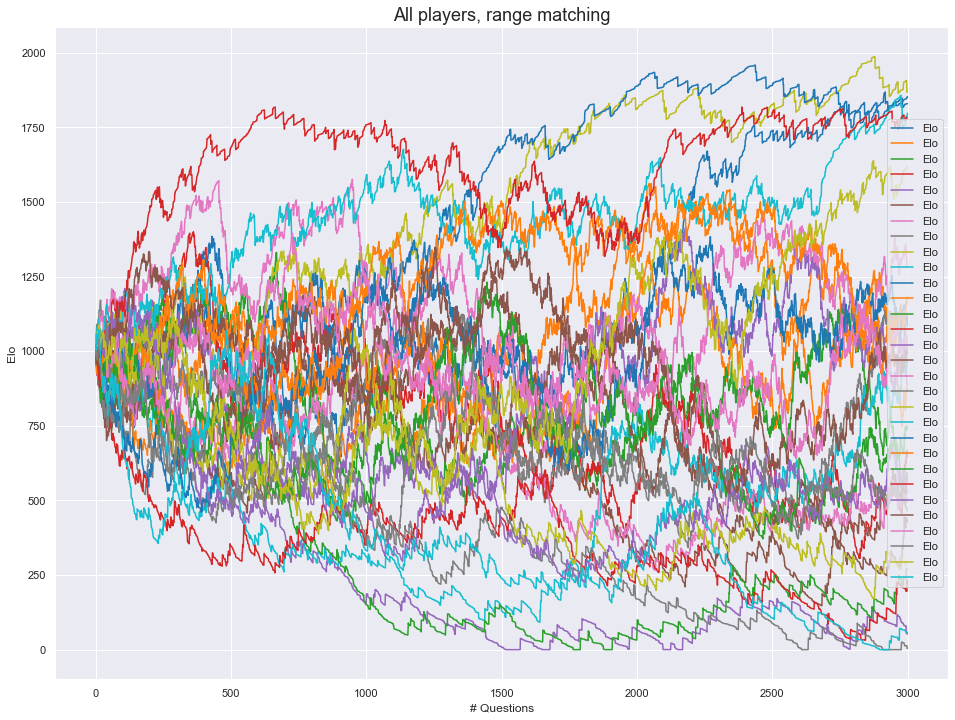

In [17]:
from matplotlib import figure

#This produces the Time Series Graphs as in the google drive
# Change dfR to dfAc or dfPer
dfR = pd.read_csv('outrand-3000-4500')
dfP = pd.read_csv('outperf-3000-4500')
df4 = pd.read_csv('outrang-3000-4500')
#dfR.drop(dfR.tail(2000).index,inplace=True)

#dfRSort = dfR.groupby(['#Questions'], sort=False)['Elo'].mean()
#dfRSort2 = dfR.groupby(['#Questions'], sort=False)['Elo'].min()
#dfRSort3 = dfR.groupby(['#Questions'], sort=False)['Elo'].max()

#df4S1 = df4.groupby(['#Questions'], sort=False)['Elo'].mean()
#df4S2 = df4.groupby(['#Questions'], sort=False)['Elo'].min()
#df4S3 = df4.groupby(['#Questions'], sort=False)['Elo'].max()

#dfPS1 = dfP.groupby(['#Questions'], sort=False)['Elo'].mean()
#dfPS2 = dfP.groupby(['#Questions'], sort=False)['Elo'].min()
#dfPS3 = dfP.groupby(['#Questions'], sort=False)['Elo'].max()

dfRSort = dfR[dfR['Player'] % 1 == 0]
df4Sort = df4[df4['Player'] % 1 == 0]
dfPSort = dfP[dfP['Player'] % 1 == 0]

fig, ax = plt.subplots(figsize=(16, 12))
#plt.ylim(150, 1800)
#plt.xlim(0, 3000)
#dfSort.plot(ax=ax)
dfRSort.groupby('Player').plot(y = 'Elo', x = '#Questions', ax=ax)
#ax.set_xlabel('Question')
#ax.set_ylabel('Elo')
#ax.set_title('Every 3rd player, random matching, every question twice', fontsize='18')
#plt.legend()
#plt.show()

#dfRSort = dfR.loc[(dfR['#Questions'] == 3500) & (dfR['Player'] < 30)]
#dfRSort = dfRSort['Elo']
#dfRSort = dfRSort.round(0)
#df4Sort = df4.loc[(df4['#Questions'] == 3000)]
#df4Sort = df4Sort['Elo']
#dfRSort = df4Sort.round(0)
#dfPSort = dfP.loc[(dfP['#Questions'] == 3000)]
#dfPSort = dfPSort['Elo']
#dfRSort = dfPSort.round(0)
#plt.hist([dfRSort, df4Sort, dfPSort, dfR2Sort], bins=20, label=['Random matching', 'Range 400', 'Perfect matching', 'Random Twice'])
#plt.hist(df4Sort, bins=20, alpha=0.5, label='Range 400')
#plt.hist(df2Sort, bins=50, label='Range 200')
#plt.hist(dfPSort, bins=20, alpha=0.5, label='Perfect')

#plt.plot(dfRSort2, color='red', label='Random')
#plt.plot(dfRSort3, color='red')
#plt.plot(df4S2, color='purple', label='Range 0.15-0.85')
#plt.plot(df4S3, color='purple')
#plt.plot(dfPS2, color='blue', label='Perfect adaptation')
#plt.plot(dfPS3, color='blue')


ax.set_xlabel('# Questions')
ax.set_ylabel('Elo')
ax.set_title('All players, range matching', fontsize='18')
plt.legend()
plt.show()

In [ ]:
dfR = pd.read_csv('outrandNORMAL')
df4 = pd.read_csv('outrang4')
df2 = pd.read_csv('outrang2')
dfP = pd.read_csv('outperf.csv')
dfR2 = pd.read_csv('outrand')

dfRSort = dfR[dfR['Player'] % 10 == 0]
df4Sort = df4[df4['Player'] % 3 == 0]
df2Sort = df2[df2['Player'] % 3 == 0]
dfPSort = dfP[dfP['Player'] % 3 == 0]
dfR2Sort = dfR2[dfR2['Player'] % 3 == 0]

for index, row in dfR.iterrows():